In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
california = fetch_california_housing()
x = california.data
y = california.target
feature_name = california.feature_names

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [36]:
def plot_coefficients(coefficients, feature_name,titles):
    plt.Figure(figsize=(12,6))
    plt.barh(feature_name,coefficients)
    plt.xlabel('Coefficoent value')
    plt.title(titles)
    plt.grid(True)
    plt.show()


=== Basic Model ===

LinearRegressionResult
Training RMSE: 0.719676
Testing RMSE: 0.745581
Training R^2: 0.612551
Testing R^2: 0.575788


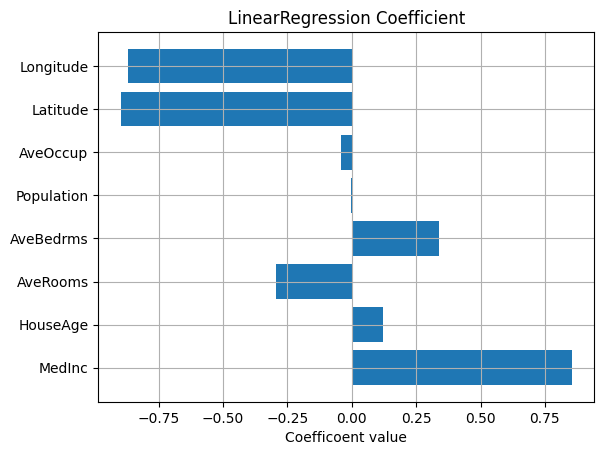


Ridge RegressionResult
Training RMSE: 0.719676
Testing RMSE: 0.745579
Training R^2: 0.612551
Testing R^2: 0.575791


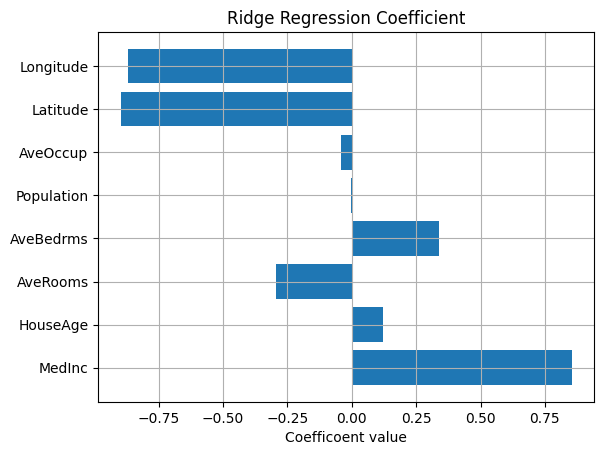


Lasso RegressionResult
Training RMSE: 0.819658
Testing RMSE: 0.824396
Training R^2: 0.497419
Testing R^2: 0.481361


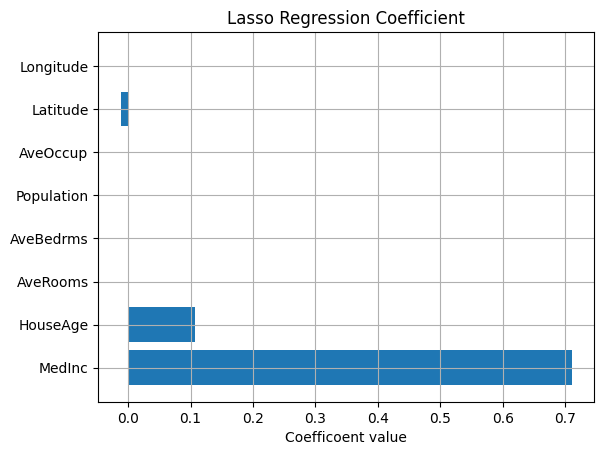


ElasticNet RegressionResult
Training RMSE: 0.792002
Testing RMSE: 0.797406
Training R^2: 0.530762
Testing R^2: 0.514765


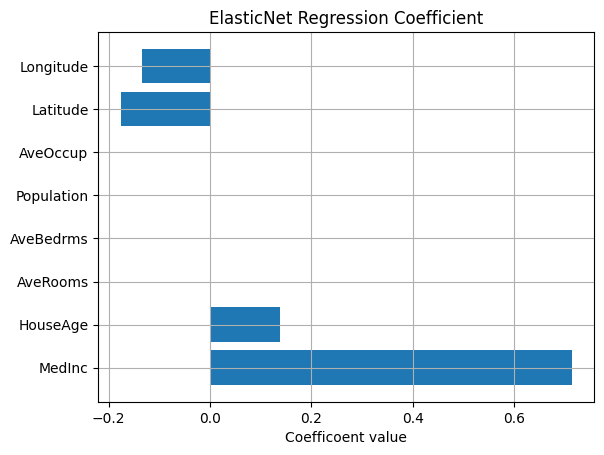

In [39]:
def evaluate_model(model, x_train, y_train, x_test, y_test, model_name):
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    print(f"\n{model_name}Result")
    print(f"Training RMSE: {train_rmse:4f}")
    print(f"Testing RMSE: {test_rmse:4f}")
    print(f"Training R^2: {train_r2:4f}")
    print(f"Testing R^2: {test_r2:4f}")

    #plot coefficient
    if hasattr(model,"coef_"):
        plot_coefficients(model.coef_, feature_name, f"{model_name} Coefficient")
    return {
        'model': model,
        'train_rmse' : train_rmse,
        'test_rmse' : test_rmse,
        'train_r2' : train_r2,
        'test_r2' : test_r2
    }

# Basic model training and evaluation
print('\n=== Basic Model ===')
models = {
    'LinearRegression': LinearRegression(),
    'Ridge Regression' : Ridge(alpha=0.1),
    'Lasso Regression' : Lasso(alpha=0.1),
    'ElasticNet Regression' : ElasticNet(alpha=0.1,l1_ratio=0.5)
    }
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, x_train_scaled,y_train,x_test_scaled,y_test,name)